Stock Analysis of Financial Sectors

In [1]:
#import pandas to use series and dataframe
#import numpy for quantitative work
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
# Use pip to install datareader module 
!pip install pandas_datareader

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 107 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 76.1 MB/s eta 0:00:01


In [3]:
from pandas_datareader import DataReader

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
#install seaborn to use graphs
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 215 kB 3.4 MB/s eta 0:00:01


In [5]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [8]:
#Set start and end date to today and a year ago today respectively
end=datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [9]:
#List of companies that will be compared in this analysis
tech_list = ['JBLU', 'OXY', 'RCL', 'BIIB']

In [10]:
#Takes data for each stock from Yahoo Finance
for stock in tech_list:
    globals()[stock]= DataReader(stock, 'yahoo', start, end)

In [11]:
a = JBLU
b = OXY
c = RCL
d = BIIB

In [12]:
#Quick summary of selected stock
a.describe(include = 'all')

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,18.390675,17.931988,18.165394,18.140188,5.225094e+06,18.140188
std,1.475354,1.559914,1.501029,1.556352,3.194920e+06,1.556352
min,12.420000,10.415000,11.660000,10.417700,8.752000e+05,10.417700
25%,17.230000,16.870001,17.005000,16.992500,3.354250e+06,16.992500
50%,18.755000,18.290000,18.505000,18.510000,4.344250e+06,18.510000
75%,19.422500,19.025001,19.247500,19.207500,5.652250e+06,19.207500
max,21.650000,21.180000,21.580000,21.559999,2.117880e+07,21.559999


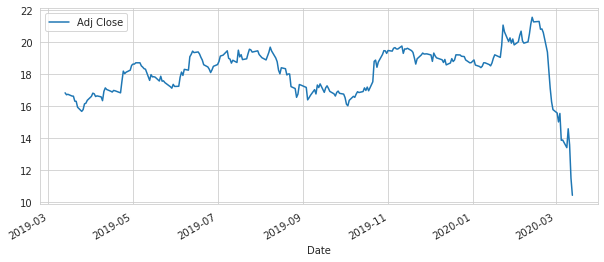

In [13]:
#Plot of Adjusted CLosing Price of selected stock
a['Adj Close'].plot(legend=True, figsize = (10,4))

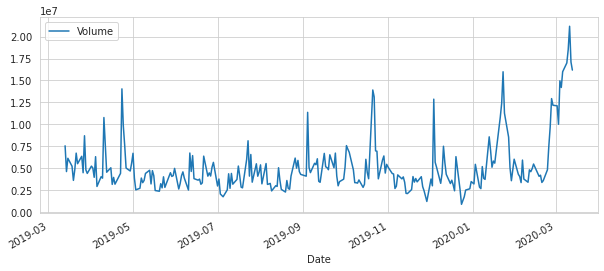

In [14]:
#Plot of Volume of selected stock
a['Volume'].plot(legend=True, figsize = (10,4))

In [15]:
#Use For-loop to calculate moving averages of selected stock
#Look at 50 days to determine value of a short term trade and 200 days to determine the value of a long term investment
ma_day = [50,200]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    a[column_name]= pd.Series.rolling(a['Adj Close'], ma).mean()

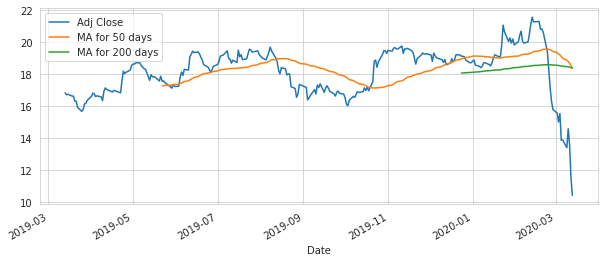

In [16]:
#Plot moving averages of selected stock
a[['Adj Close', 'MA for 50 days', 'MA for 200 days']].plot(subplots = False, figsize=(10,4))

In [17]:
#Create new column that determines daily return by calculating percentage change
a['Daily Return'] = a['Adj Close'].pct_change()

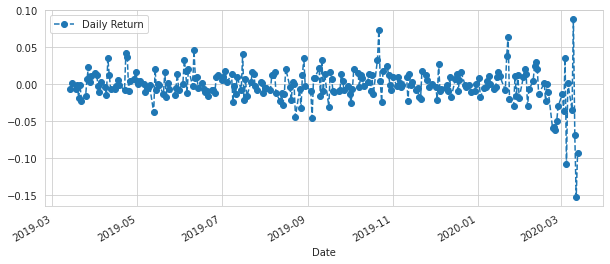

In [18]:
#Plot Daily Return of selected stock
a['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

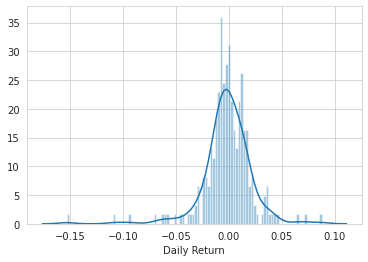

In [20]:
#Plot Distribution Plot of Daily Return of selected stock bereft of null values
sns.distplot(a['Daily Return'].dropna(), bins = 100)

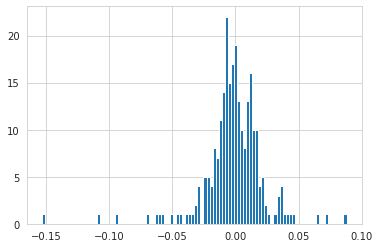

In [21]:
#Plot Histogram Daily Return of selected stock
a['Daily Return'].hist(bins = 100)

In [22]:
#Create new data frame of closing prices by date for each stock provided in this analysis project.
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [23]:
#Quick summary of closing prices
closing_df.head()

Symbols,JBLU,OXY,RCL,BIIB
Date,,,,
2019-03-13,16.830000,59.825615,113.806183,320.559998
2019-03-14,16.709999,59.963551,113.155136,321.519989
2019-03-15,16.740000,60.202633,113.864487,329.869995
2019-03-18,16.629999,61.618732,114.952797,325.649994
2019-03-19,16.620001,60.846313,114.117134,323.760010


In [24]:
#Percentage change of closing price for each stock by day 
tech_rets= closing_df.pct_change()

In [25]:
#Quick summary of daily percentage changes of stocks
tech_rets.tail()

Symbols,JBLU,OXY,RCL,BIIB
Date,,,,
2020-03-09,-0.034582,-0.520138,-0.257499,-0.065293
2020-03-10,0.088060,0.146283,0.070437,0.028399
2020-03-11,-0.069273,-0.177127,-0.141281,-0.037235
2020-03-12,-0.153279,0.007627,-0.317782,-0.086219
2020-03-13,-0.092689,0.071489,0.065900,0.084015


In [26]:
#Import moduel for use of statistical analysis
import scipy.stats as stats

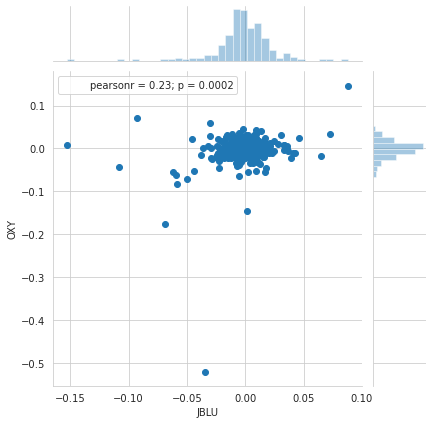

In [28]:
#Examine correlation between percentage change for two of the stocks
sns.jointplot('JBLU', 'OXY', tech_rets, kind = 'scatter').annotate(stats.pearsonr)

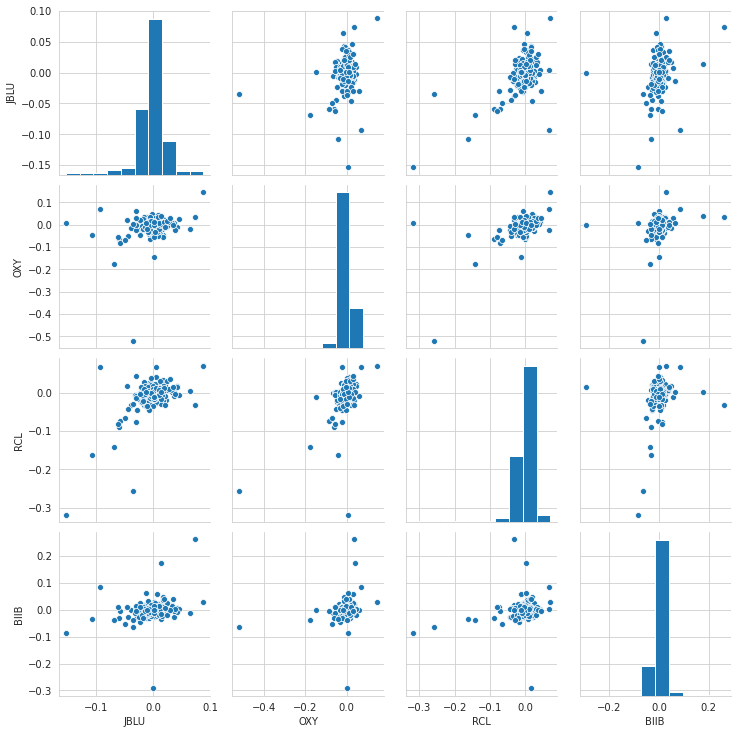

In [29]:
sns.pairplot(tech_rets.dropna())

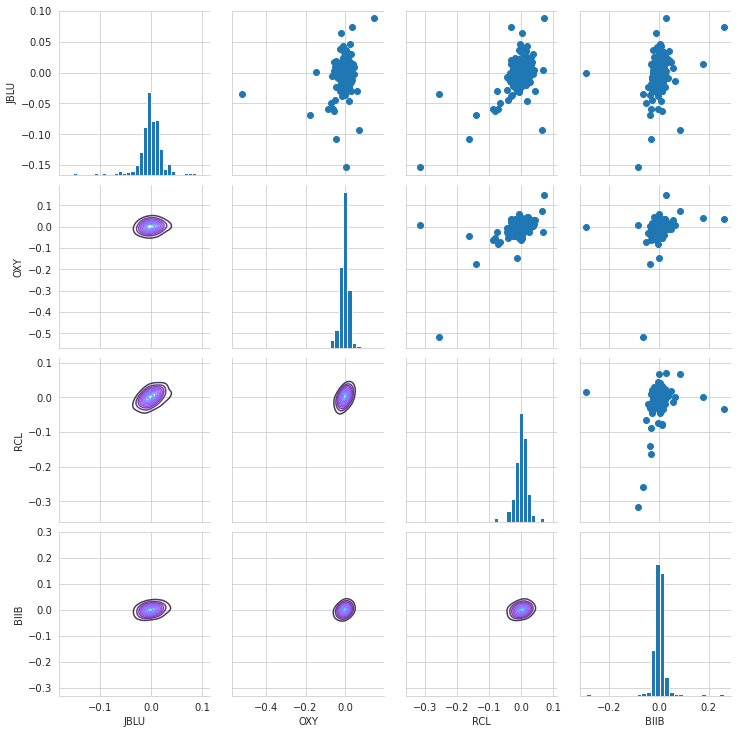

In [30]:
#Plot scatter, histogram, and kde figures to examine correlation between percentage changes in closing prices
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

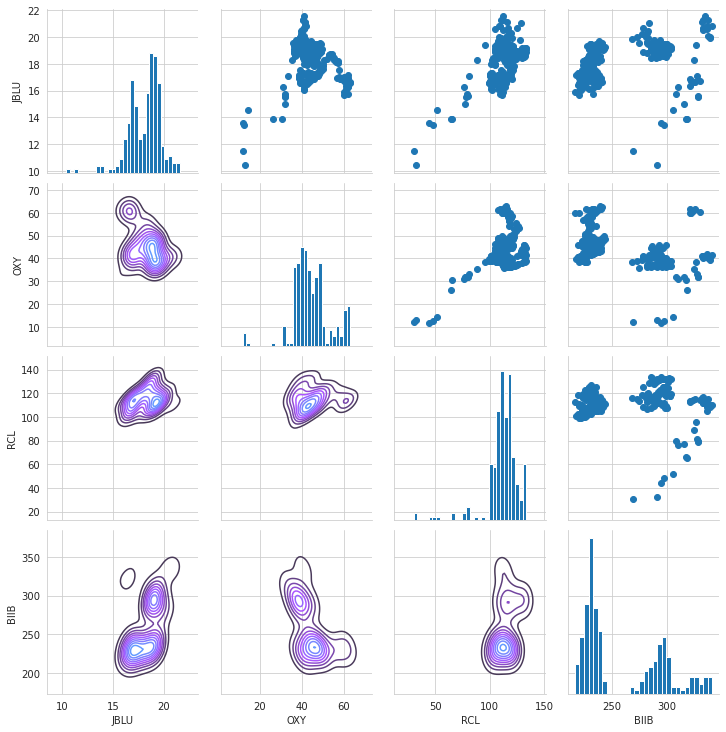

In [31]:
#Plot scatter, histogram, and kde subplots to examine closing price correlations
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins=30)

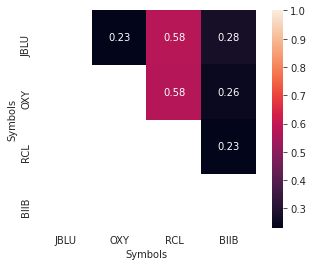

In [32]:
#Heat map that displays correlational values between daily percentages changes.  
#Use mask to hide duplicate values so only unique values are displayed
mask = np.tril(tech_rets.dropna().corr())
sns.heatmap(tech_rets.dropna().corr(), square = True, mask = mask, annot = True)

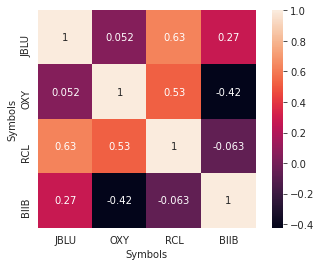

In [33]:
#Heat map displaying correlation of CLosing Prices by day between stocks
#Mask is used to hide duplicate values so only unique ones are shown
#mask = np.tril(closing_df.dropna().corr())
sns.heatmap(closing_df.dropna().corr(), square = True, annot = True)

In [34]:
#New data frame is created that drops the null values of the daily percentage changes data frame 
rets = tech_rets.dropna()

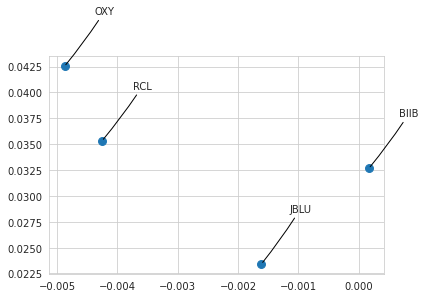

In [35]:
#Graph the stocks based on the averages and standard deviations of daily percentage changes for Risk Analysis
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),s = area)
plt.xlabel = ('Expected Return')
plt.ylabel = ('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label, 
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color = 'black',connectionstyle = 'arc3, rad = -.03'))

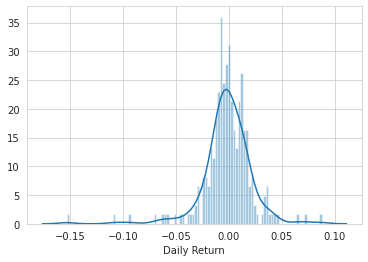

In [37]:
#Display distribution plot of selected stock again to set premise for the Monte Carlo Method of 
sns.distplot(a['Daily Return'].dropna(), bins = 100)

In [38]:
#Quick summary of 
rets.head()

Symbols,JBLU,OXY,RCL,BIIB
Date,,,,
2019-03-14,-0.007130,0.002306,-0.005721,0.002995
2019-03-15,0.001795,0.003987,0.006269,0.025970
2019-03-18,-0.006571,0.023522,0.009558,-0.012793
2019-03-19,-0.000601,-0.012535,-0.007270,-0.005804
2019-03-20,-0.018652,0.016473,-0.012262,-0.009791


In [41]:
#The .01 empirical quantile of daily returns
#With 99% confidence, the worst daily loss will not be greater than that percentage.
rets['JBLU'].quantile(.01)

-0.08051280120081415

In [43]:
#Create variables to be used in Monte Carlo Method of determining Value at Risk
days = 365

dt = 1/days

mu = rets.mean()['JBLU']

sigma = rets.std()['OXY']

In [44]:
#Define Monte Carlo function to run many trials of random market conditions
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [45]:
#Quick summary of stock to see start price from a year ago today
a.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 50 days,MA for 200 days,Daily Return
Date,,,,,,,,,
2019-03-13,16.879999,16.400000,16.580000,16.830000,7546200,16.830000,NaN,NaN,NaN
2019-03-14,17.090000,16.660000,16.840000,16.709999,4608000,16.709999,NaN,NaN,-0.007130
2019-03-15,16.990000,16.650000,16.770000,16.740000,6122500,16.740000,NaN,NaN,0.001795
2019-03-18,16.799999,16.450001,16.719999,16.629999,5221200,16.629999,NaN,NaN,-0.006571
2019-03-19,16.850000,16.559999,16.670000,16.620001,3604100,16.620001,NaN,NaN,-0.000601


TypeError: 'str' object is not callable

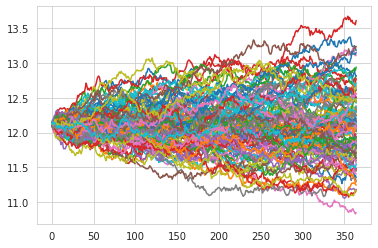

In [46]:
#Run Monte Carlo Method for stock based on start price from a year ago today and daily return value percentages
start_price = 12.12
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for ET")

In [47]:
#Create 10000 trials of monte carlo method for stock
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution of ET after 365 days')

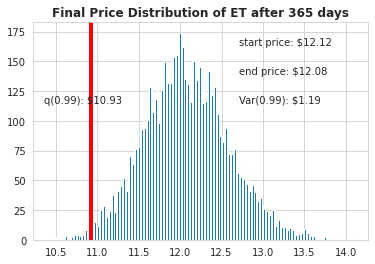

In [48]:
#Set percentiles of simulations
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

#Starting Price
plt.figtext(0.6, 0.8, s = "start price: $%.2f" %(start_price))

#Mean Ending Price
plt.figtext(0.6,0.7, s = "end price: $%.2f" %simulations.mean())

#Variance of the Price (within 99% confidence interval)
plt.figtext(0.6,0.6,"Var(0.99): $%.2f " %(start_price-q,))

#Display 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)

#Plot a line at the 1% quantile risk

plt.axvline(x = q, linewidth = 4, color = 'r')

#Title

plt.title(u"Final Price Distribution of ET after% d days" %days, weight = 'bold')